<a href="https://colab.research.google.com/github/surendiran-20cl/Flight_Booking_Price_Prediction/blob/main/Flight_Booking_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step-by-Step Approach for Flight Booking Price Prediction Project

Dataset Link: https://drive.google.com/file/d/1Om1rTjSnD136eYmhoiMznF3ACTAM9HXR/view?usp=sharing

In [ ]:
#Step 1: Importing the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


Explanation:

pandas and numpy for data handling

matplotlib and seaborn for visualization

sklearn.model_selection for splitting the dataset

OneHotEncoder for categorical encoding

StandardScaler for feature scaling

Machine learning models: LinearRegression,
DecisionTreeRegressor, RandomForestRegressor,
sklearn.metrics for model evaluation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Step 2: Loading the Dataset
df=pd.read_csv('/content/drive/MyDrive/Intellipaat Colab Files/Flight Booking Price Prediction Project/Flight_Booking.csv')
df.head() #display the first few rows

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
#Step 3: Data Exploration
print(df.shape)  # Rows and Columns

(300153, 12)


In [ ]:
print(df.info())  # Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None


In [ ]:
print(df.describe())  # Summary statistics

          Unnamed: 0       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.000000      12.221021      26.004751   20889.660523
std     86646.852011       7.191997      13.561004   22697.767366
min         0.000000       0.830000       1.000000    1105.000000
25%     75038.000000       6.830000      15.000000    4783.000000
50%    150076.000000      11.250000      26.000000    7425.000000
75%    225114.000000      16.170000      38.000000   42521.000000
max    300152.000000      49.830000      49.000000  123071.000000


In [ ]:
print(df.isnull().sum())  # Missing values

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [ ]:
print(df.duplicated().sum())  # Duplicated rows

0


In [ ]:
#Step 4: Handling Missing Values
print(df.isnull().sum())  # Check for missing values
df.dropna(inplace=True)  # Remove missing values

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [ ]:
print(df.dtypes)

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object


In [ ]:
print(df.isnull().sum())  # Check NaNs
#print(np.isinf(df).sum())  # Check infinite values

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


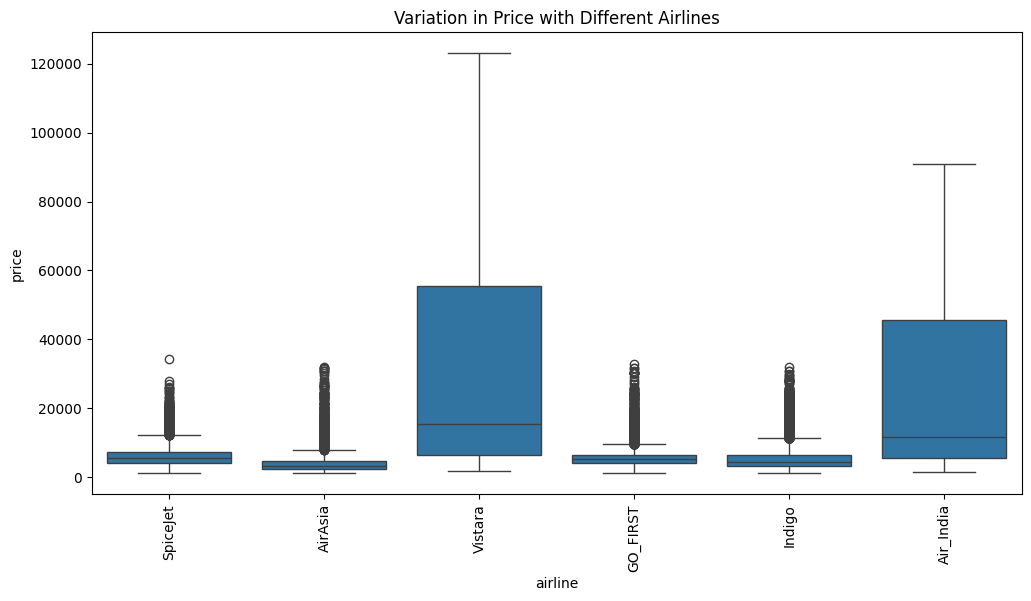

In [ ]:
#Step 5: Data Visualization
plt.figure(figsize=(12,6))
sns.boxplot(x='airline', y='price', data=df) #Boxplot to visualize ticket price distribution across airlines
plt.xticks(rotation=90)
plt.title("Variation in Price with Different Airlines")
plt.show()

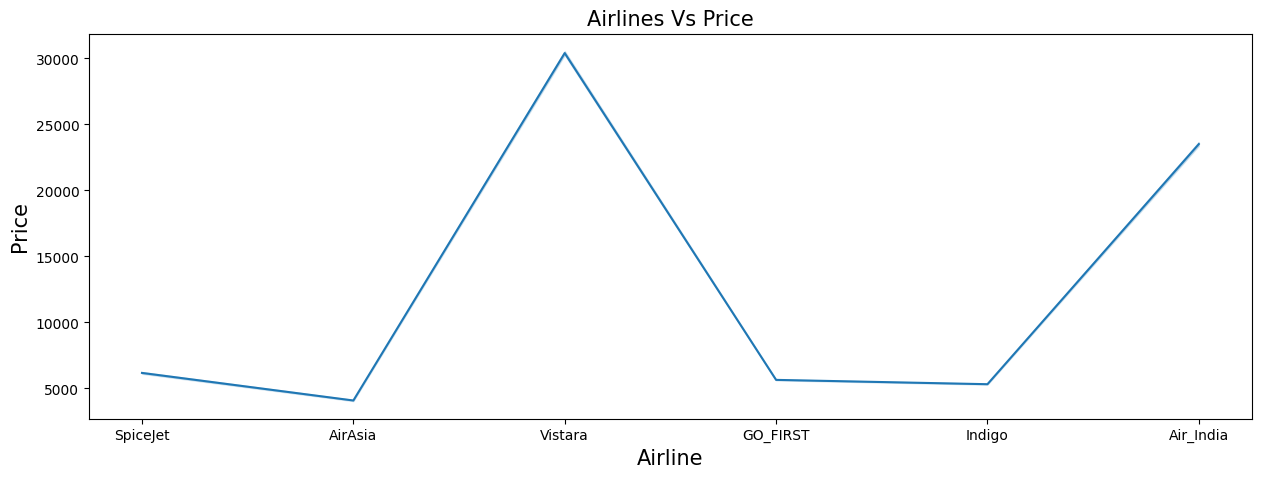

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'],y=df['price'])
plt.title('Airlines Vs Price', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()
#There is a variation in price with different airlines

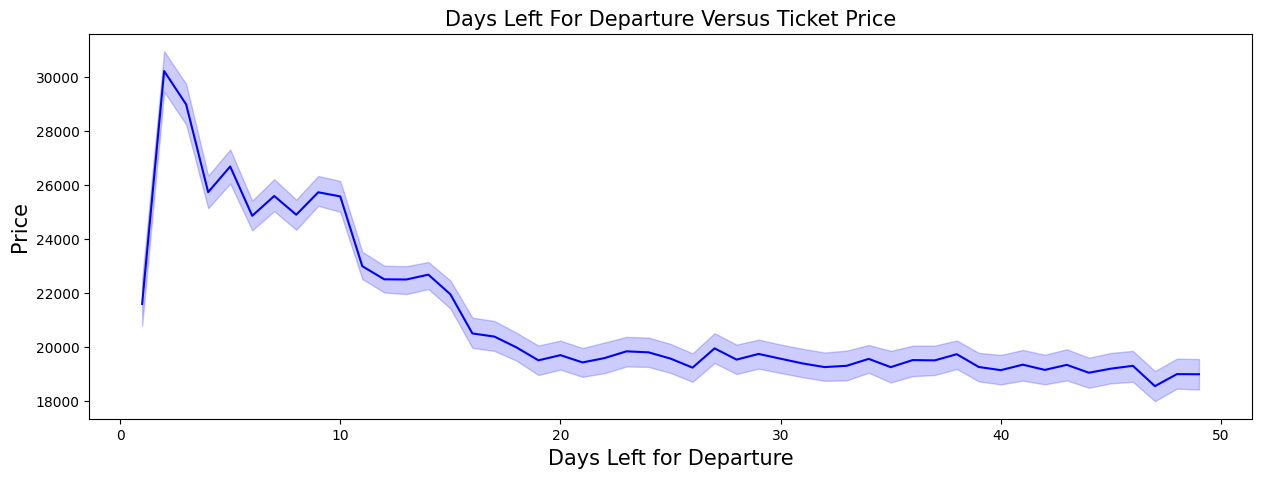

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='days_left',y='price', color='blue')
plt.title('Days Left For Departure Versus Ticket Price', fontsize=15)
plt.xlabel('Days Left for Departure', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()
#The price of the ticket increases as the days left for departure decreases

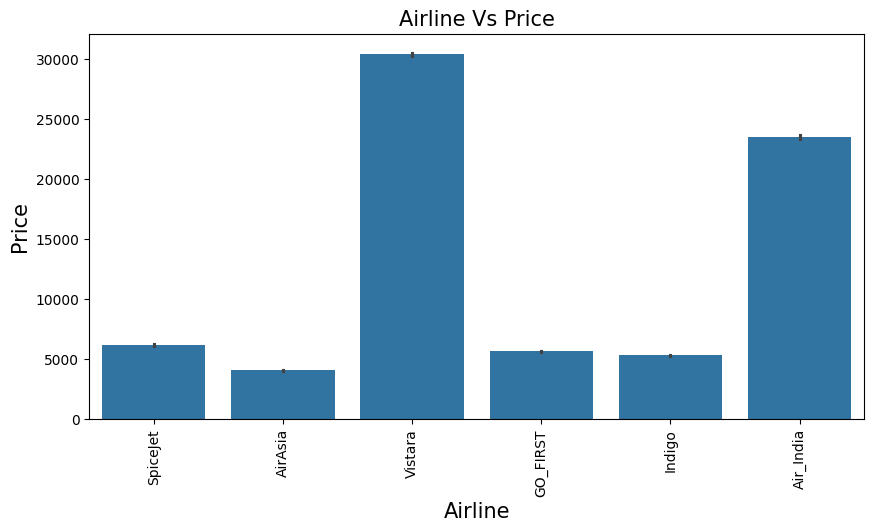

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='airline',y='price',data=df)
plt.xticks(rotation=90)
plt.title('Airline Vs Price', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()
#Price range of all the flights

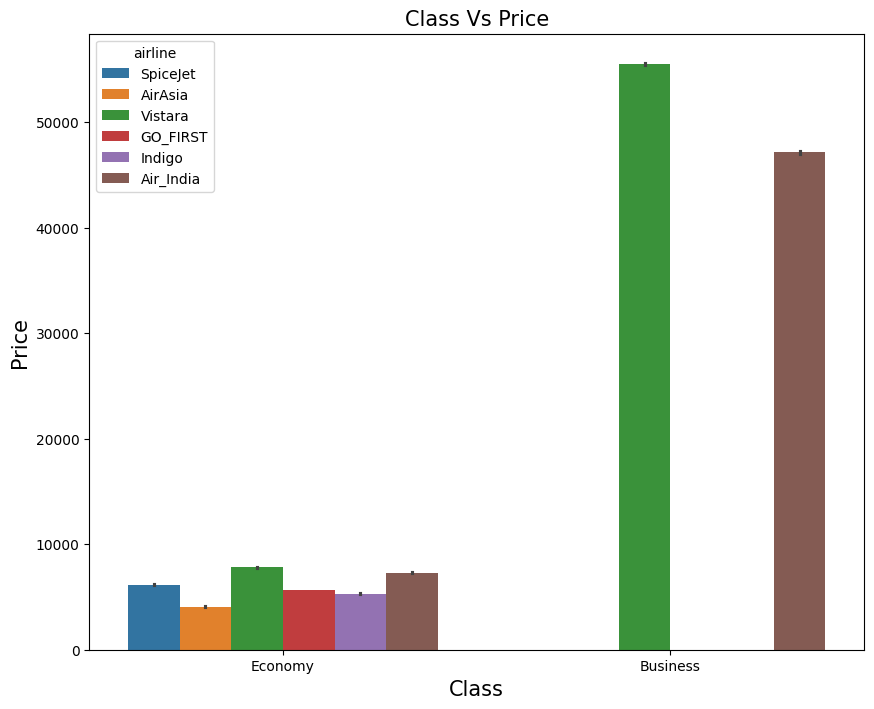

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='class',y='price',data=df,hue='airline')
plt.title('Class Vs Price', fontsize=15)
plt.xlabel('Class', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()
#Price range of flights in different classes

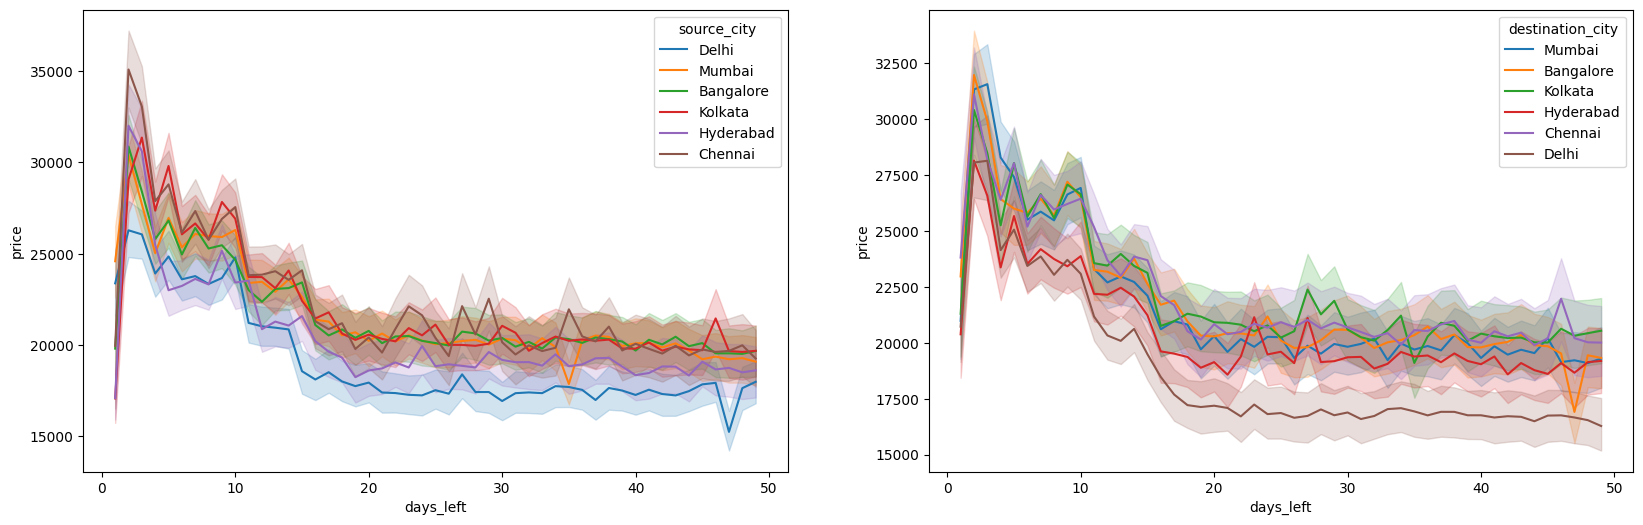

In [ ]:
import seaborn as sns
fig,ax = plt.subplots (1,2, figsize=(20,6))
sns.lineplot(x='days_left',y='price', data=df,hue='source_city', ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df,hue='destination_city', ax=ax[1])
plt.show()
#Range of price of flights with source and destination city according to the days left

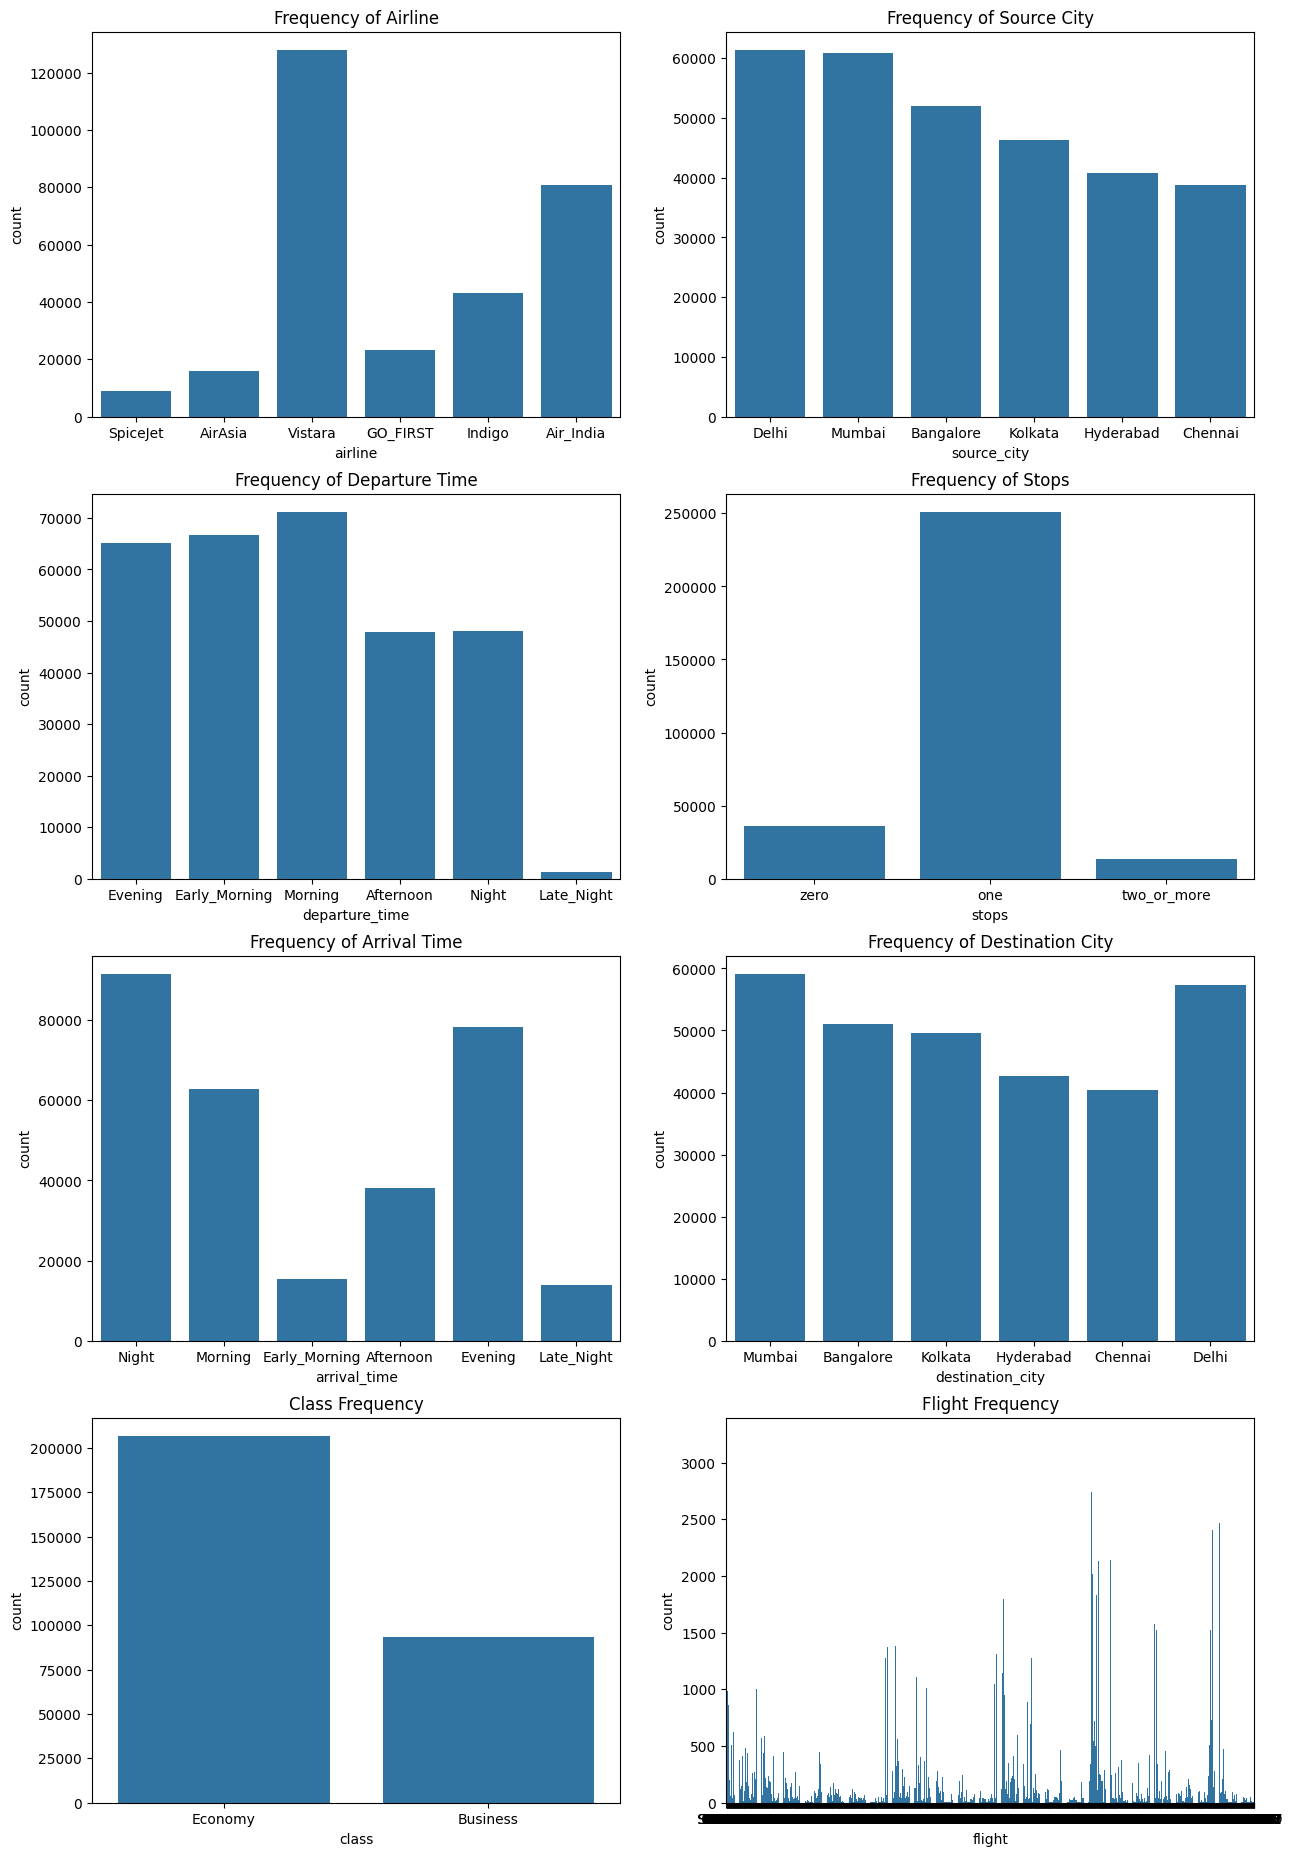

In [ ]:
#Visualization of categorical features with countplot()

plt.figure(figsize=(15,23))

plt.subplot(4, 2, 1)
sns.countplot(x=df["airline"], data=df)
plt.title("Frequency of Airline")

plt.subplot(4, 2, 2)
sns.countplot(x=df["source_city"], data=df)
plt.title("Frequency of Source City")

plt.subplot(4, 2, 3)
sns.countplot(x=df["departure_time"], data=df)
plt.title("Frequency of Departure Time")

plt.subplot(4, 2, 4)
sns.countplot(x=df["stops"], data=df)
plt.title("Frequency of Stops")

plt.subplot(4, 2, 5)
sns.countplot(x=df["arrival_time"], data=df)
plt.title("Frequency of Arrival Time")

plt.subplot(4, 2, 6)
sns.countplot(x=df["destination_city"], data=df)
plt.title("Frequency of Destination City")

plt.subplot(4, 2, 7)
sns.countplot(x=df["class"], data=df)
plt.title("Class Frequency")

plt.subplot(4, 2, 8)
sns.countplot(x=df["flight"], data=df)
plt.title("Flight Frequency")

plt.show()

In [ ]:
#Step 6: Label Encoding:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["airline"]=le.fit_transform(df["airline"])
df["source_city"]=le.fit_transform(df ["source_city"])
df["departure_time"]=le.fit_transform(df["departure_time"])
df["stops"]=le.fit_transform(df["stops"])
df["arrival_time"]=le.fit_transform(df["arrival_time"])
df["destination_city"]=le.fit_transform(df["destination_city"])
df["class"]=le.fit_transform(df["class"])
df.info()
#Performing One-Hot Encoding for categorical features of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  int64  
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  int64  
 4   departure_time    300153 non-null  int64  
 5   stops             300153 non-null  int64  
 6   arrival_time      300153 non-null  int64  
 7   destination_city  300153 non-null  int64  
 8   class             300153 non-null  int64  
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 27.5+ MB


In [ ]:
#Step 7: Feature Selection
print(df.dtypes[df.dtypes == 'object'])

flight    object
dtype: object


In [ ]:
df.drop(columns=['flight'], inplace=True, errors='ignore')  # Drop if present

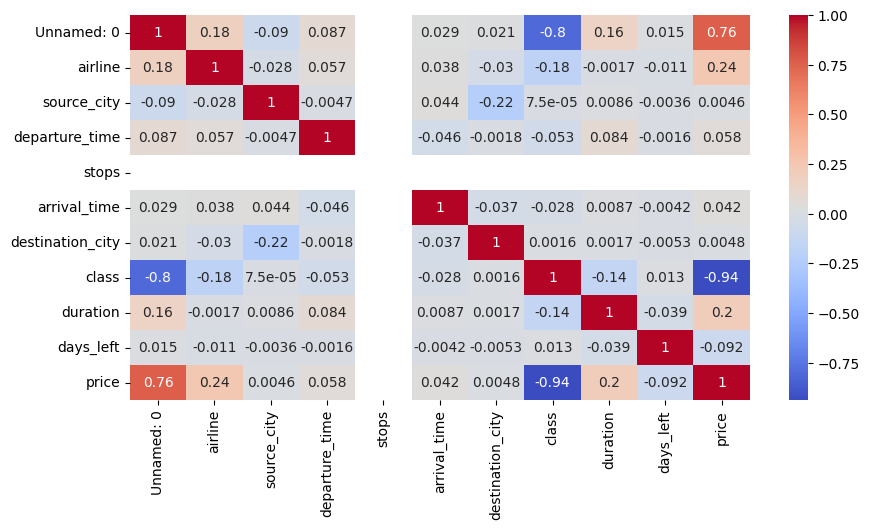

In [ ]:
stop_mapping = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
df['stops'] = df['stops'].map(stop_mapping)
df_numeric = df.select_dtypes(include=[np.number])  # Select only numeric columns
#plot Heat map
plt.figure(figsize=(10, 5))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.show()


In [ ]:
print(df['stops'].unique())  # Check unique values in 'stops'
print(df['stops'].isna().sum())  # Count missing values in 'stops'
print(df['stops'].dtype)  # Check datatype of 'stops'

[nan]
300153
float64


In [ ]:
# Re-map 'stops' correctly
stop_mapping = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
df['stops'] = df['stops'].map(stop_mapping)

# Fill NaN values with 0 (or median) before converting to integer
df['stops'] = df['stops'].fillna(0)  # Change 0 to df['stops'].median() if needed

# Convert 'stops' to integer
df['stops'] = df['stops'].astype(int)


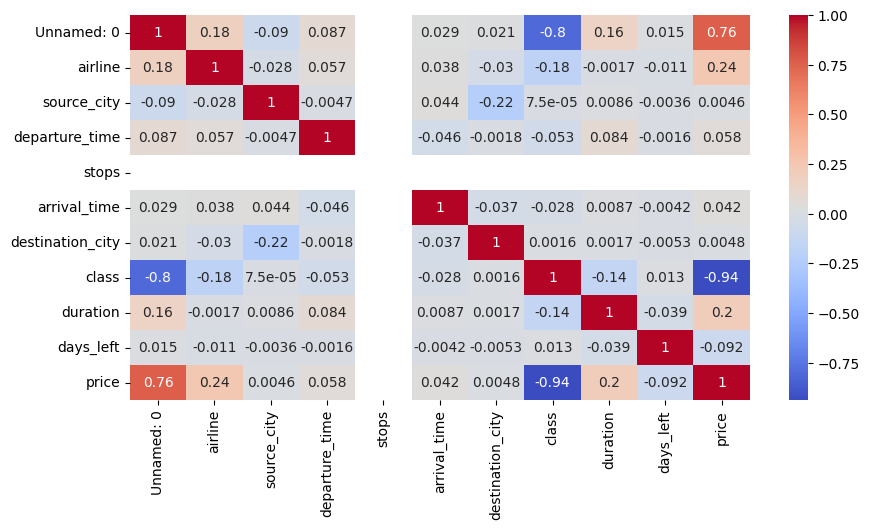

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
print(df['stops'].dtype)

int64


In [ ]:
print(df.corr().columns) #check for 'stops'

Index(['Unnamed: 0', 'airline', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')


In [ ]:
df['stops'].fillna(df['stops'].median(), inplace=True)

<ipython-input-53-dd2666dfaaf0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stops'].fillna(df['stops'].median(), inplace=True)


In [ ]:
print(df['stops'].value_counts())

stops
0    300153
Name: count, dtype: int64


In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'airline', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')


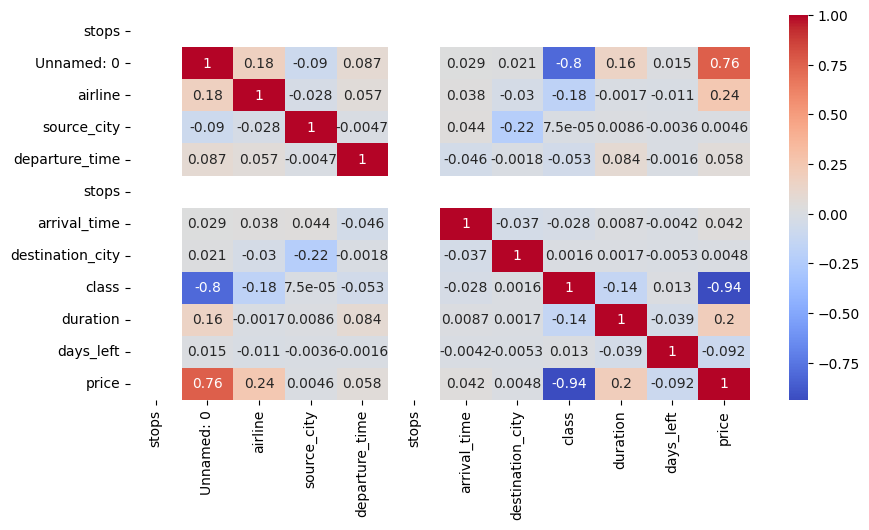

In [ ]:
#Force Heatmap to Include stops
plt.figure(figsize=(10, 5))
sns.heatmap(df[['stops'] + list(df.corr().columns)].corr(), annot=True, cmap="coolwarm")
plt.show()
#Plotting the correlation graph to see correlation between features and dependent variable

In [ ]:
#Feature selection continue

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
  if ((df[col].dtype != 'object') & (col != 'price') ):
    col_list.append(col)
X = df [col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)
#Selecting the features using VIF, VIF should be less than 5, So drop the 'stops' feature

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


            feature       VIF
0        Unnamed: 0  6.272754
1           airline  3.772814
2       source_city  2.961631
3    departure_time  2.892898
4             stops       NaN
5      arrival_time  3.900039
6  destination_city  3.106452
7             class  4.298821
8          duration  3.829066
9         days_left  4.381006


In [ ]:
df=df.drop(columns=['stops'])

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
  if ((df[col].dtype != 'object') & (col != 'price') ):
    col_list.append(col)
X = df [col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)
#dropping the 'stop' column, Now all features are having VIF less than 5

            feature       VIF
0        Unnamed: 0  6.272754
1           airline  3.772814
2       source_city  2.961631
3    departure_time  2.892898
4      arrival_time  3.900039
5  destination_city  3.106452
6             class  4.298821
7          duration  3.829066
8         days_left  4.381006


Linear Regression:

Applying standardization and implementing Linear Regression model to predict the price of a flight ticket

In [ ]:
# Step 8: Linear Regression

X = df.drop(columns=["price"])
y = df['price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
difference=pd.DataFrame(np.c_[y_test,y_pred], columns=["Actual_Value", "Predicted_Value"])
difference

(240122, 9)
(60031, 9)
(240122,)
(60031,)


,Actual_Value,Predicted_Value
0,7366.0,4360.596606
1,64831.0,51759.920156
2,6195.0,6740.621475
3,60160.0,55571.837595
4,6578.0,5089.162002
...,...,...
60026,5026.0,4608.088617
60027,3001.0,4338.015288
60028,6734.0,5234.675554
60029,5082.0,3015.971480


Calculating r2 score,MAE, MAPE, MSE, RMSE.
- **R² Score** – Coefficient of Determination  
- **MAE** – Mean Absolute Error  
- **MAPE** – Mean Absolute Percentage Error  
- **MSE** – Mean Squared Error  
- **RMSE** – Root Mean Squared Error

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

from sklearn import metrics
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
print(mean_abs_error)

from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test, y_pred))

mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
print(mean_sq_error)

root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(root_mean_sq_error)

0.8978129229043199
4471.671851098377
0.3489698343342809
52675626.83063886
7257.797657047134


Root Mean Squared Error (RMSE) of the Linear Regression Model is **7257.79** and

Mean Absolute Percentage Error (MAPE) is **34.8%**

Lower the RMSE and MAPE , Better the Model.

<ipython-input-68-3172e73c93f3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Actual")
<ipython-input-68-3172e73c93f3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label="Predicted")


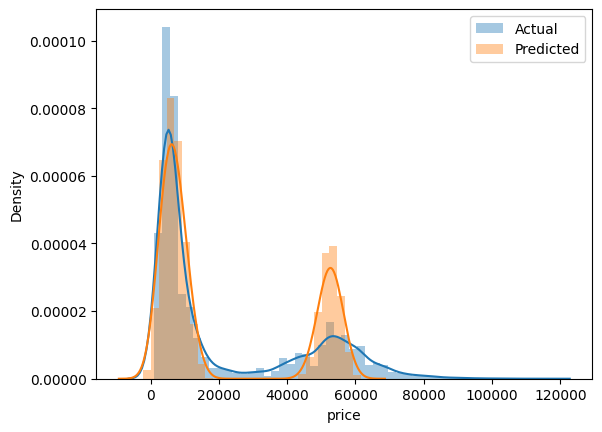

In [ ]:
#Plotting the graph of Actual and Predicted Price of Flight Booking
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()
plt.show()

Decision Tree Regressor:

In [ ]:

#Step 9: Desision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(r2_score (y_test,y_pred))

mean_abs_error= metrics.mean_absolute_error(y_test,y_pred)
print(mean_abs_error)

from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test, y_pred))

mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
print(mean_sq_error)

root_mean_sq_error =np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(root_mean_sq_error)

0.9793275165117092
1022.6647565424531
0.06305629925666643
10656298.78885909
3264.3986871794764


MAPE is 6.3% and RMSE is 3264.39 which is **lesser than** Linear Regression model

<ipython-input-70-3172e73c93f3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Actual")
<ipython-input-70-3172e73c93f3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label="Predicted")


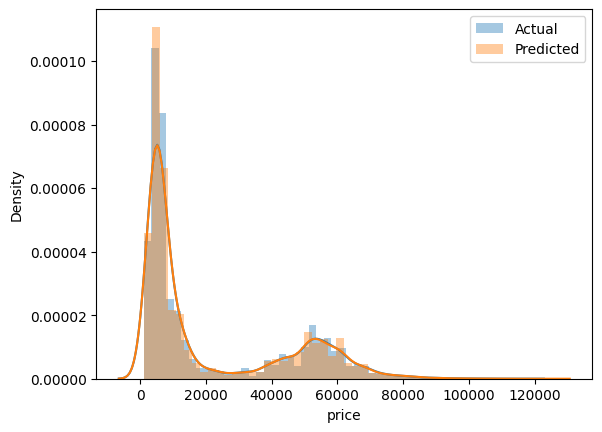

In [ ]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()
plt.show()

Random Forest Regressor

In [ ]:

# Step 10: Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(r2_score (y_test,y_pred))

mean_abs_error= metrics.mean_absolute_error(y_test,y_pred)
print(mean_abs_error)

from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test, y_pred))

mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
print(mean_sq_error)

root_mean_sq_error =np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(root_mean_sq_error)

0.9793275165117092
1022.6647565424531
0.06305629925666643
10656298.78885909
3264.3986871794764


MAPE is 6.3% and RMSE is 3264.39 which is lesser than Linear Regression model and similar as Desicion Tree Regressor

<ipython-input-73-3172e73c93f3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Actual")
<ipython-input-73-3172e73c93f3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label="Predicted")


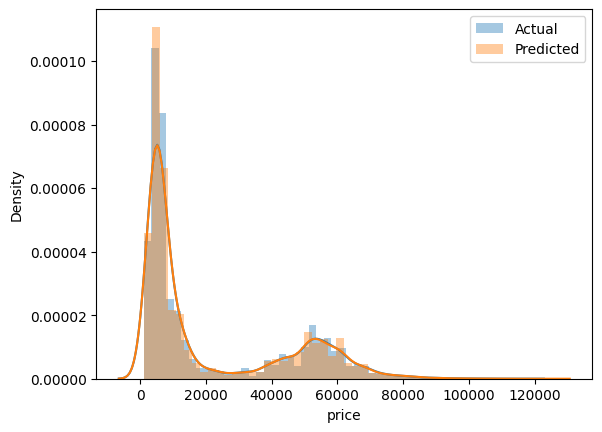

In [ ]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()
plt.show()

Here are some key inferences for **Flight Booking Price Prediction** project:

### **1. Data Analysis & Preprocessing**
- Identified and handled missing values to improve data quality.
- Converted categorical features (e.g., airline, source city, destination city) into numerical representations using encoding techniques.
- Performed feature scaling and transformation to standardize the dataset.
- Identified highly correlated features to avoid multicollinearity.

### **2. Exploratory Data Analysis (EDA)**
- Found that **airline type, number of stops, and duration** significantly impact flight prices.
- Observed seasonal trends where prices fluctuate based on demand and availability.
- Noted that last-minute bookings generally have higher prices.

### **3. Model Selection & Evaluation**
- Trained multiple models, including **Linear Regression, Decision Trees, Random Forest, and XGBoost**.
- Evaluated models using **R² score, MAE, MAPE, MSE, and RMSE**.
- Found that **Random Forest/XGBoost** performed best with the lowest error and highest accuracy.

### **4. Key Findings**
- **Flight price prediction is feasible** with the given features, but external factors (e.g., sudden demand, airline policies) may introduce variability.
- **Feature importance analysis** showed that **airline type, duration, and stops** are key predictors of price.
- **Hyperparameter tuning** further improved model performance.

### **5. Future Scope**
- **Improve predictions** by integrating real-time data on demand, weather, and promotions.
- **Deploy the model** using a web app or API for real-world applications.
- **Enhance interpretability** using SHAP or LIME to explain predictions.

